In [ ]:
from datasets import load_dataset
from audio_augmentator import Augmentator
import time
from typing import Iterable
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [9]:
SAMPLE_RATE = 16000
noises_dataset_path = "..//processed_noises_dataset"  #'path to dataset'
silero_val_model_path = "../silero_vad.jit"  # path to silero model path (for new version it's not necessary)

In [3]:
golos_crowd10h = load_dataset("bond005/sberdevices_golos_10h_crowd")

train_data = golos_crowd10h["train"]
test_data = golos_crowd10h["test"]
val_data = golos_crowd10h['validation']

In [4]:
def measure_time_for_augmentation(
        augmentator: Augmentator,
        data: Iterable,
):
    durations: list[float] = []
    times_for_augmentations: list[float] = []
    for sample in tqdm(data):
        audio_array = sample["audio"]["array"][None]
        audio_duration = audio_array.size / SAMPLE_RATE
        durations.append(audio_duration)

        start_time = time.time()
        augmented_audio = augmentator.augmentate(audio_array)
        end_time = time.time()

        for name, aug_sample in augmented_audio.items():
            assert aug_sample.shape == audio_array.shape, \
                f"Shapes are not equal! Expected shape: {audio_array.shape}, got shape: {aug_sample.shape}"
        times_for_augmentations.append(float(end_time - start_time))
    return durations, times_for_augmentations

In [10]:
augmentator = Augmentator(
    noises_dataset=noises_dataset_path,
    silero_vad_model_path=silero_val_model_path,
    decibels=10.0,
    household_noises=True,
    pets_noises=True,
    speech_noises=True,
    background_music_noises=True,
    to_mix=True
)

In [11]:
# test_durations, test_aug_time = measure_time_for_augmentation(augmentator=augmentator, data=test_data)
val_durations, val_aug_time = measure_time_for_augmentation(augmentator=augmentator, data=val_data)


100%|██████████| 793/793 [00:09<00:00, 86.87it/s] 


Третье число - процент времени, который уходит на аугментацию, по сравнению с длительностями сигналов

In [12]:
np.mean(val_durations), np.mean(val_aug_time), np.mean(val_aug_time) / np.mean(val_durations)

(4.097114911727616, 0.0079629631691893, 0.0019435537788789)

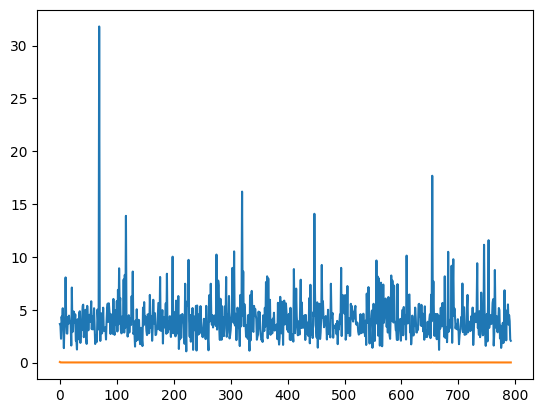

In [13]:
plt.plot(val_durations)
plt.plot(val_aug_time)


In [20]:
sample_idx_to_test = 415

augmentator = Augmentator(
    noises_dataset=noises_dataset_path,
    silero_vad_model_path=silero_val_model_path,
    decibels=10.0,
    household_noises=True,
    pets_noises=True,
    speech_noises=True,
    background_music_noises=True,
    to_mix=True
)
sample = train_data[sample_idx_to_test]['audio']['array']
aug_sample = augmentator.augmentate(sample)

names = list(aug_sample.keys())
print("Original audio:")
display(IPython.display.Audio(sample, rate=16000))
print("First one of augmented:")
display(IPython.display.Audio(aug_sample[names[0]], rate=16000))


Original audio:


First one of augmented:
